# Website Traffic Forecasting(Unique visitors)


## About dataset :

Context

This file contains 5 years of daily time series data for several measures of traffic on a statistical forecasting teaching notes website whose alias is statforecasting.com. The variables have complex seasonality that is keyed to the day of the week and to the academic calendar. The patterns you you see here are similar in principle to what you would see in other daily data with day-of-week and time-of-year effects. Some good exercises are to develop a 1-day-ahead forecasting model, a 7-day ahead forecasting model, and an entire-next-week forecasting model (i.e., next 7 days) for unique visitors.

The variables are daily counts of page loads, unique visitors, first-time visitors, and returning visitors to an academic teaching notes website. There are 2167 rows of data spanning the date range from September 14, 2014, to August 19, 2020. A visit is defined as a stream of hits on one or more pages on the site on a given day by the same user, as identified by IP address. Multiple individuals with a shared IP address (e.g., in a computer lab) are considered as a single user, so real users may be undercounted to some extent. A visit is classified as "unique" if a hit from the same IP address has not come within the last 6 hours. Returning visitors are identified by cookies if those are accepted. All others are classified as first-time visitors, so the count of unique visitors is the sum of the counts of returning and first-time visitors by definition. The data was collected through a traffic monitoring service known as StatCounter.

Libraries Used : Numpy,Pandas,Matplotlib,Seaborn,Cufflinks,Sklearn,etc.,

source : Kaggle

In [3]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import pandas_profiling
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing datasets
data=pd.read_csv('C:/Users/natu/Downloads/daily-website-visitors.csv')



In [6]:
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


## Data Pre-processing

In [7]:
data.rename(columns = {'Day.Of.Week':'day_of_week'
                    ,'Page.Loads':'page_loads'
                    ,'Unique.Visits':'unique_visits'
                    ,'First.Time.Visits':'first_visits'
                    ,'Returning.Visits':'returning_visits'}, inplace = True)

data=data.replace(',','',regex=True)

data['page_loads']=data['page_loads'].astype(int)
data['unique_visits']=data['unique_visits'].astype(int)
data['first_visits']=data['first_visits'].astype(int)
data['returning_visits']=data['returning_visits'].astype(int)

data

,Row,Day,day_of_week,Date,page_loads,unique_visits,first_visits,returning_visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,2221,1696,1373,323
2163,2164,Sunday,1,8/16/2020,2724,2037,1686,351
2164,2165,Monday,2,8/17/2020,3456,2638,2181,457
2165,2166,Tuesday,3,8/18/2020,3581,2683,2184,499


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Row               2167 non-null   int64 
 1   Day               2167 non-null   object
 2   day_of_week       2167 non-null   int64 
 3   Date              2167 non-null   object
 4   page_loads        2167 non-null   int32 
 5   unique_visits     2167 non-null   int32 
 6   first_visits      2167 non-null   int32 
 7   returning_visits  2167 non-null   int32 
dtypes: int32(4), int64(2), object(2)
memory usage: 101.7+ KB


In [9]:
data.columns

Index(['Row', 'Day', 'day_of_week', 'Date', 'page_loads', 'unique_visits',
       'first_visits', 'returning_visits'],
      dtype='object')

In [10]:
data.nunique()

Row                 2167
Day                    7
day_of_week            7
Date                2167
page_loads          1756
unique_visits       1658
first_visits        1587
returning_visits     663
dtype: int64

In [11]:
data.duplicated().sum(0)

0

In [12]:
data.shape

(2167, 8)

In [13]:
data.index

RangeIndex(start=0, stop=2167, step=1)

In [14]:
data.isna().sum()

Row                 0
Day                 0
day_of_week         0
Date                0
page_loads          0
unique_visits       0
first_visits        0
returning_visits    0
dtype: int64

In [15]:
data.isnull().sum()

Row                 0
Day                 0
day_of_week         0
Date                0
page_loads          0
unique_visits       0
first_visits        0
returning_visits    0
dtype: int64

In [16]:
data.describe()

,Row,day_of_week,page_loads,unique_visits,first_visits,returning_visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


In [17]:
data.corr()

,Row,day_of_week,page_loads,unique_visits,first_visits,returning_visits
Row,1.000000,0.000800,0.059412,0.078944,0.082316,0.053233
day_of_week,0.000800,1.000000,-0.253006,-0.255127,-0.256785,-0.217418
page_loads,0.059412,-0.253006,1.000000,0.988691,0.980704,0.913340
unique_visits,0.078944,-0.255127,0.988691,1.000000,0.996164,0.902950
first_visits,0.082316,-0.256785,0.980704,0.996164,1.000000,0.861882
returning_visits,0.053233,-0.217418,0.913340,0.902950,0.861882,1.000000


In [18]:
data.head()

,Row,Day,day_of_week,Date,page_loads,unique_visits,first_visits,returning_visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236


In [19]:
data.tail()

,Row,Day,day_of_week,Date,page_loads,unique_visits,first_visits,returning_visits
2162,2163,Saturday,7,8/15/2020,2221,1696,1373,323
2163,2164,Sunday,1,8/16/2020,2724,2037,1686,351
2164,2165,Monday,2,8/17/2020,3456,2638,2181,457
2165,2166,Tuesday,3,8/18/2020,3581,2683,2184,499
2166,2167,Wednesday,4,8/19/2020,2064,1564,1297,267


## Data visualization

In [20]:
px.area(data,x='Date',y=['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits'],
       labels={'value':'Visits'}
       ,title='Page Loads & visitors over Time')

Generating line plot for visualizing the trend of page loads and visits over time series, it seems that page loads and visits have a constant fluctuation, means they have trend over time and are correlated to each other.

In [21]:
px.histogram(data,x='unique_visits',color='Day',title='unique visits for each day')



This histogram plot represent the sum of unique visits for each day in the week against count of unique visits for each day in the week.but from this plot it's hard to estimate which day had the most unique visitors, so we will explore more deeper.

In [23]:
day_imp=data.groupby(['Day'])['unique_visits'].agg(['sum']).sort_values(by='sum',ascending=False)
px.bar(day_imp,labels={'value':'sum of unique visits'},title='Sum of Unique visits for each day')

With this bar plot it is clear that tuesday, wednesday, monday and thursday are the days in a week when extensive amount of traffic come to this website


In [24]:
px.histogram(data,x='Date',y='unique_visits',color='Day',title='Sum of unique visits for each day over Time')


Get the sum of page_loads unique_visits first_visits returning_visits related to each of their days

sum of unique visits for each week day over time series, we know which days get the most traffic but on what time intervals ? this graph answers to that question.

Time intervals are grouped according to their relation with unique visits and days, now we can understand that in which days, months and years did the website get the most traffic.


In [25]:
sums=data.groupby(['Day'])[['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits']].sum().sort_values(
    by='unique_visits',ascending=False)
sums

,page_loads,unique_visits,first_visits,returning_visits
Day,,,,
Tuesday,1536154,1097181,907752,189429
Wednesday,1517114,1085624,897602,188022
Monday,1502161,1072112,886036,186076
Thursday,1437269,1028214,848921,179293
Friday,1149437,817852,668805,149047
Sunday,1006564,725794,604198,121596
Saturday,772817,552105,456449,95656


In [26]:
px.bar(sums,barmode='group',title='Sum of page loads and visits for each of their days')


this grouped bar chart comes from the crosstab above and it shows the sum of page_loads, unique_visits, first_visits, returning_visits for each day

In [27]:
px.density_heatmap(data, x='Date',y=['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits']
#color_continuous_scale="Viridis"
                   
                   ,marginal_x="histogram", marginal_y="histogram",title='Correlation for each data point')


This is a heatmap graph that shows the correlation of each datapoint from page_loads, unique_visits, first_visits , returning_visits columns, first visits seems to have a great correlation with unique visits.

The Yellow points indicate a great correlation between first visits and unique visits, but we don't how much let's find that out

<AxesSubplot:>

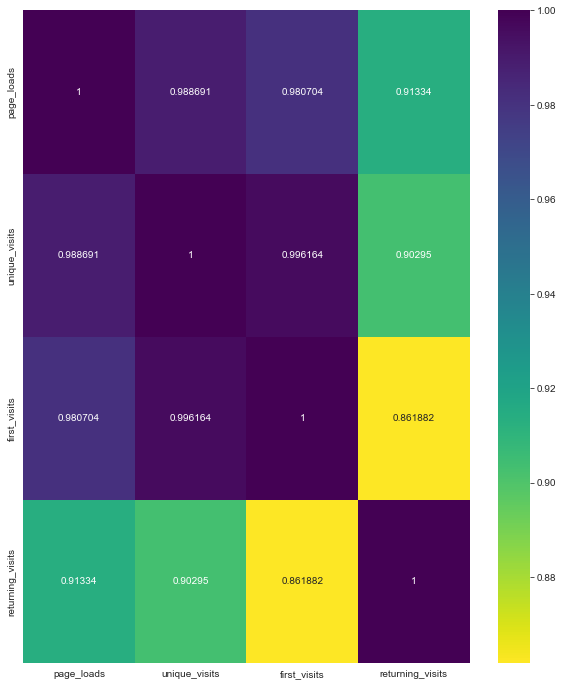

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 12)
sns.heatmap(data[['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits']].corr(),
            annot=True,
            cmap='viridis_r', 
            fmt='g')

This shows the paired correlation of page_loads unique_visits first_visits returning_visits columns with annotated values we know that first visits and unique visits are correlated by 0.99 which is a great correlation and page loads have a good correlation with our target variable as well.


let's see how the correlation looks like in our next plot.


In [29]:
px.scatter_matrix(data[['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits']])


This scatter matrix plot shows the paired plot of page_loads unique_visits first_visits returning_visits we can see that unique visits and first visits have a straight upward line, that means that first visits are increasing as the unique visits increase. we can also other pairs and identify their level of correlation visualy.

#### The last thing we need is to visualize the trend line.


In [30]:
px.scatter(
    data, x='first_visits', y='unique_visits',opacity=0.5,
    trendline='ols', trendline_color_override='red',title="Regression line for unique visits and first visits"
)

 Now here we have the regression line pointing upward which confirms the trend between these two columns


In [31]:
px.violin(data,y=['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits'],box=True,points='all')


Here,see there  are no outliears that need to be dealt with, data is tightly packed with no dispersion except for returning visits, this column was also less correlated with our target variable.


###  Atlast,we  need  only these columns and include some features to it

In [32]:
pred_data=data[['page_loads' ,'unique_visits' ,'first_visits' ,'returning_visits','Day']]


Tuesday, wednesday, thursday and monday are the days when our website received the most traffic so we will create a feature days_f of them 1 value will define their existence and 0 will define the rest of the days.


In [33]:
pred_data['days_f']=np.where((data['Day']=='Tuesday') | 
                      (data['Day']=='Wednesday') | 
                      (data['Day']=='Thursday') |
                      (data['Day']=='Monday'),1,0)

pred_data

,page_loads,unique_visits,first_visits,returning_visits,Day,days_f
0,2146,1582,1430,152,Sunday,0
1,3621,2528,2297,231,Monday,1
2,3698,2630,2352,278,Tuesday,1
3,3667,2614,2327,287,Wednesday,1
4,3316,2366,2130,236,Thursday,1
...,...,...,...,...,...,...
2162,2221,1696,1373,323,Saturday,0
2163,2724,2037,1686,351,Sunday,0
2164,3456,2638,2181,457,Monday,1
2165,3581,2683,2184,499,Tuesday,1


In [34]:
pred_data.drop('Day',axis=1,inplace=True)

In [35]:
pred_data.head(5)

,page_loads,unique_visits,first_visits,returning_visits,days_f
0,2146,1582,1430,152,0
1,3621,2528,2297,231,1
2,3698,2630,2352,278,1
3,3667,2614,2327,287,1
4,3316,2366,2130,236,1


### Method: Multiple Linear Regression

separate the independent variable and dependent / target variable


In [36]:
X2=pred_data[['page_loads','first_visits' ,'returning_visits','days_f']]
y2=pred_data['unique_visits']

#### split the dataset into train and test data


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state=0)

train the model with train data


In [38]:
regressor2 = LinearRegression(fit_intercept=False,normalize=True)
regressor2.fit(X_train, y_train)


LinearRegression(fit_intercept=False, normalize=True)

In [39]:
y_pred2 = regressor2.predict(X_test)

#### Predict the values

In [41]:
lr2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
lr2

,Actual,Predicted
194,2946,2946.0
602,2663,2663.0
443,4743,4743.0
829,2914,2914.0
909,1714,1714.0
...,...,...
461,1319,1319.0
144,3170,3170.0
1533,3371,3371.0
1205,1120,1120.0


<AxesSubplot:>

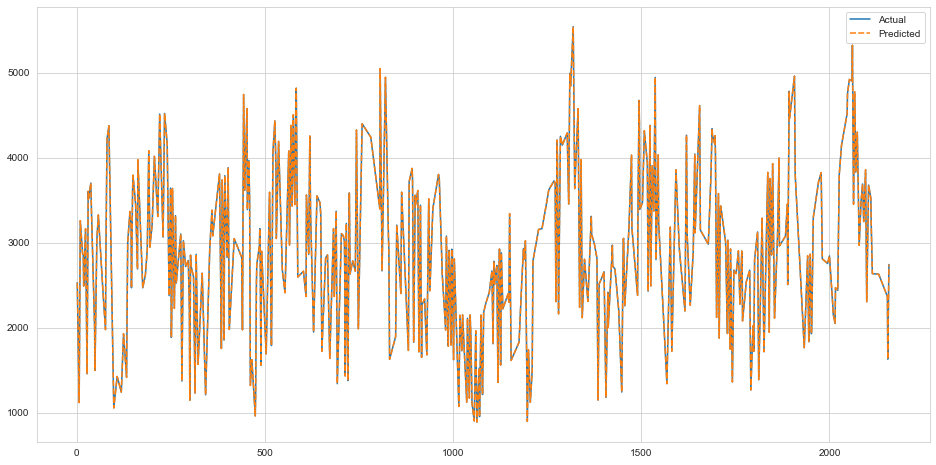

In [42]:
plt.figure(figsize=(16,8))
sns.lineplot(data=lr2)

### Get the accuacy score of the model.


In [43]:
regressor2.score(X_test,y_test)*100

100.0

Here, Our Fitted Model is Perfect Model

## Support Vector Regression


In [44]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [45]:
y_pred3 = svr_rbf.predict(X_test)

#### Predict the values

In [46]:
svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
svr

,Actual,Predicted
194,2946,2945.859378
602,2663,2662.795376
443,4743,4747.989709
829,2914,2914.364001
909,1714,1714.624839
...,...,...
461,1319,1312.133396
144,3170,3169.676050
1533,3371,3371.198310
1205,1120,1117.331713


<AxesSubplot:>

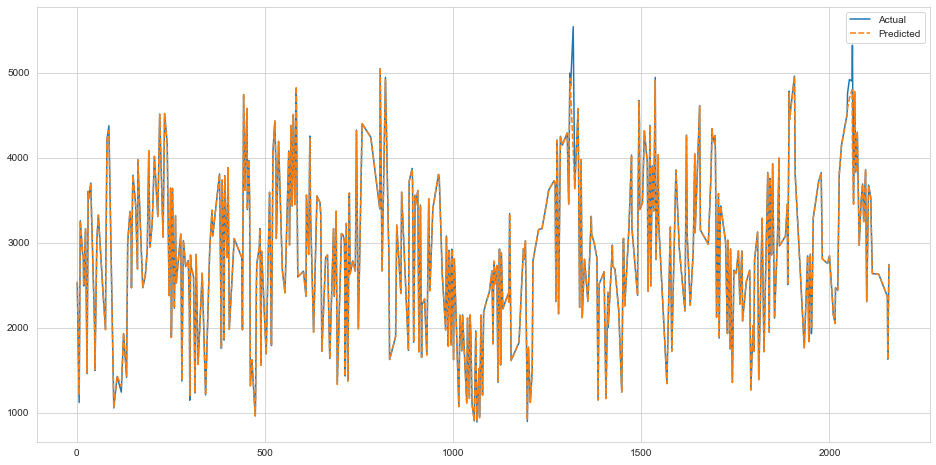

In [47]:
plt.figure(figsize=(16,8))
sns.lineplot(data=svr)

#### Accuracy of the Model

In [48]:
svr_rbf.score(X_test,y_test)*100

99.06548385892556

Here, Our Fitted Model is Good Model

## Decision Tree Regression


In [49]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
dtr_pred = dtr.predict(X_test)

#### Predict the Values

In [52]:
dtr_a = pd.DataFrame({'Actual': y_test, 'Predicted': dtr_pred})
dtr_a

,Actual,Predicted
194,2946,2919.0
602,2663,2725.0
443,4743,4674.0
829,2914,2844.0
909,1714,1704.0
...,...,...
461,1319,1308.0
144,3170,3194.0
1533,3371,3366.0
1205,1120,1142.0


<AxesSubplot:>

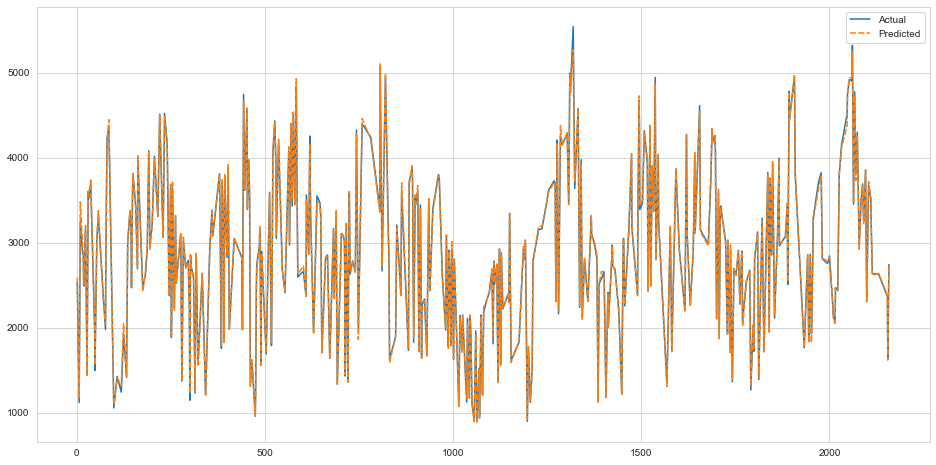

In [53]:
plt.figure(figsize=(16,8))
sns.lineplot(data=dtr_a)

#### Accuracy of the Model

In [54]:
dtr.score(X_test,y_test)*100

99.83013773423333

Here, Our Fitted Model is Good Model

## XGboost regression


In [55]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [56]:
xgb_pred = xgb_r.predict(X_test)

#### Predict the values

In [57]:
xgb_data = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred})
xgb_data

,Actual,Predicted
194,2946,2885.072754
602,2663,2616.867432
443,4743,4660.478027
829,2914,2716.295654
909,1714,1595.013306
...,...,...
461,1319,1261.242676
144,3170,3073.613525
1533,3371,3333.441406
1205,1120,1067.806152


<AxesSubplot:>

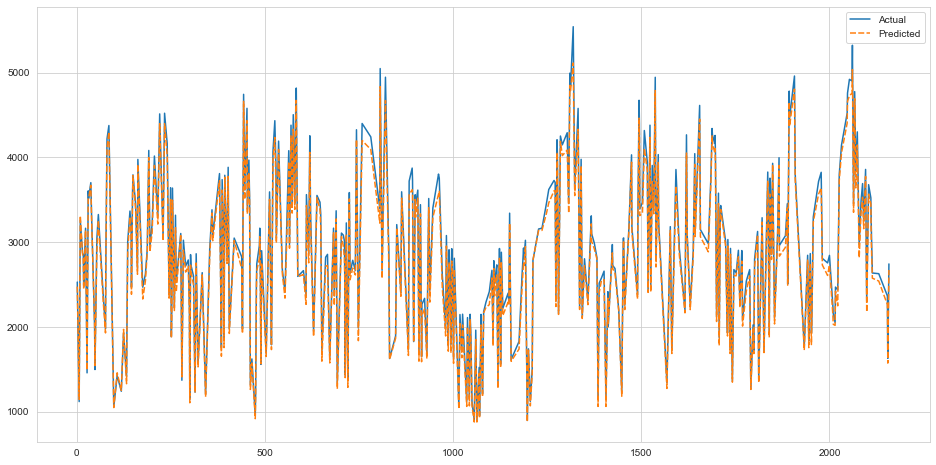

In [58]:
plt.figure(figsize=(16,8))
sns.lineplot(data=xgb_data)

#### Accuracy of the Model

In [59]:
xgb_r.score(X_test,y_test)*100

98.82116485432437

Here, Our Fitted Model is Good Model

###### Conclusion

Here the analysis of the dataset "Website Traffic Forecasting" was done.The dataset was downloaded from kaggle which consists aily counts of page loads, unique visitors, first-time visitors, and returning visitors to an academic teaching notes website. There are 2167 rows of data spanning the date range from September 14, 2014, to August 19, 2020.The attempt was to use various regression models to predict the which days received the most traffic.Here R2 score are used to evaluate and compare the performance of regressors. The following Results are

 1) Multiple Linear Regression: R2 Score: 100
 
 2) Support Vector Regression : R2 Score: 99.06548385892556
   
 3) DecisionTree Regression: R2 Score: 99.830137734233338
 
 4) XGboost Regression : R2 Score: 98.82116485432437
 
   


#### Looking at the above results, it can be concluded that  Mutiple Linear Regression Model is recommended as it will give a Accurate Performance compared to other models.

## Thank you